In [68]:
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
def load_json_to_df(datapass):
    '''
    Load the json file and parse the file to pandas dataframe format
    
    Input:
        datapass(str) : directory to the json file
    Output:
        df(dataframe) : pandas dataframe object
    '''
    
    data = [] 
    with open(datapass) as data_file: 
        for f in data_file:
            data.append(json.loads(f))
    df = pd.DataFrame(data)
    return df

In [70]:
checkin = load_json_to_df("checkin.json")

In [71]:
check = checkin["time"]

In [104]:
def numofeachday(rest):
    d = {}
    for i in rest.keys():
        d[i] = sum(rest[i].values())
    return d

In [137]:
l = []
for i in range(100000):
    l.append(numofeachday(check[i]))
dic = {'Sunday': 0,'Monday': 0, 'Tuesday': 0,'Wednesday': 0,'Thursday': 0,  'Friday': 0, 'Saturday': 0}
for i in l:
    for day in i.keys():
        dic[day] += i[day]
dic

{'Friday': 1925975,
 'Monday': 1618938,
 'Saturday': 2636624,
 'Sunday': 2415908,
 'Thursday': 1661307,
 'Tuesday': 1565940,
 'Wednesday': 1616063}

2415908
1618938
1565940
1616063
1661307
1925975
2636624


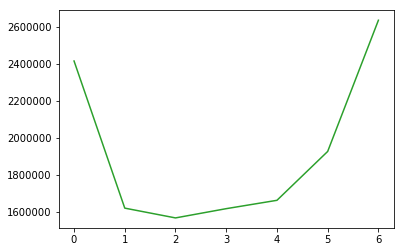

In [139]:
l = []
for i in dic.values():
    print (i)
    l.append(i)
    
plt.plot(range(7),l)
plt.show()

In [140]:
biz = load_json_to_df("business.json")

In [144]:
biz.head(10)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,691 Richmond Rd,"{'RestaurantsPriceRange2': 2, 'BusinessParking...",YDf95gJZaq05wvo7hTQbbQ,"[Shopping, Shopping Centers]",Richmond Heights,"{'Monday': '10:00-21:00', 'Tuesday': '10:00-21...",1,41.541716,-81.493116,Richmond Town Square,,44143,17,2.0,OH
1,2824 Milton Rd,"{'GoodForMeal': {'dessert': False, 'latenight'...",mLwM-h2YhXl2NCgdS84_Bw,"[Food, Soul Food, Convenience Stores, Restaura...",Charlotte,"{'Monday': '10:00-22:00', 'Tuesday': '10:00-22...",0,35.236870,-80.741976,South Florida Style Chicken & Ribs,Eastland,28215,4,4.5,NC
2,337 Danforth Avenue,"{'BusinessParking': {'garage': False, 'street'...",v2WhjAB3PIBA8J8VxG3wEg,"[Food, Coffee & Tea]",Toronto,"{'Monday': '10:00-19:00', 'Tuesday': '10:00-19...",0,43.677126,-79.353285,The Tea Emporium,Riverdale,M4K 1N7,7,4.5,ON
3,"7702 E Doubletree Ranch Rd, Ste 300",{},CVtCbSB1zUcUWg-9TNGTuQ,"[Professional Services, Matchmakers]",Scottsdale,"{'Friday': '9:00-17:00', 'Tuesday': '9:00-17:0...",1,33.565082,-111.916400,TRUmatch,,85258,3,3.0,AZ
4,4719 N 20Th St,"{'RestaurantsTableService': False, 'GoodForMea...",duHFBe87uNSXImQmvBh87Q,"[Sandwiches, Restaurants]",Phoenix,{},0,33.505928,-112.038847,Blimpie,,85016,10,4.5,AZ
5,2017 E Camelback Rd,"{'BusinessAcceptsCreditCards': True, 'Restaura...",uUEMrhJiL1a1pCA_I1SU7Q,"[Shopping, Tobacco Shops]",Phoenix,"{'Monday': '10:00-20:00', 'Tuesday': '10:00-20...",0,33.508068,-112.037552,Baxter's Cigars,,85016,35,5.0,AZ
6,"4425 N 24th St, Ste 125","{'AcceptsInsurance': True, 'ByAppointmentOnly'...",2eJEUJIP54tex7T9YOcLSw,"[Chiropractors, Health & Medical]",Phoenix,"{'Friday': '9:00-12:00', 'Tuesday': '14:00-19:...",1,33.502848,-112.012696,Back-Health Chiropractic,,85016,19,5.0,AZ
7,5770 Butler St,{'BusinessAcceptsCreditCards': True},fEylCY3UEH8YJ0Xa7lu6lA,"[Automotive, Oil Change Stations, Car Wash, Au...",Pittsburgh,"{'Monday': '8:00-17:00', 'Tuesday': '8:00-17:0...",1,40.485939,-79.943727,Auto Bathouse,Lawrenceville,15201,16,2.5,PA
8,3220 Washington Rd,"{'DogsAllowed': True, 'BusinessParking': {'gar...",kFtuYklkAIlmYw8RZAieGw,"[Jewelry Repair, Gold Buyers, Local Services, ...",McMurray,"{'Monday': '10:00-18:00', 'Tuesday': '10:00-18...",1,40.290498,-80.110021,JAB Jewelry Designs,,15317,7,5.0,PA
9,"1425 S Higley Rd, Ste 103","{'AcceptsInsurance': True, 'ByAppointmentOnly'...",NqiQdFa93wzUJGo29NbTPQ,"[Health & Medical, Optometrists]",Gilbert,"{'Friday': '7:30-11:00', 'Tuesday': '7:30-17:0...",1,33.324539,-111.720449,Neighborhood Vision Center,,85296,8,5.0,AZ


In [148]:
biz.groupby('state').sum().sort_values(by = 'stars', ascending = False)

,is_open,latitude,longitude,review_count,stars
state,,,,,
AZ,40193,1.586757e+06,-5.305489e+06,1459409,176608.0
NV,25648,1.104194e+06,-3.520700e+06,1650578,113509.0
ON,21755,1.158976e+06,-2.106336e+06,570082,91375.0
NC,9696,3.979954e+05,-9.133040e+05,272977,40474.5
OH,9490,4.527218e+05,-8.924869e+05,219072,39064.5
PA,7666,3.605583e+05,-7.128817e+05,206301,32367.0
QC,6204,3.310285e+05,-5.353613e+05,129961,26784.5
WI,3507,1.804837e+05,-3.746087e+05,99828,15337.0
EDH,2888,1.992711e+05,-1.152724e+04,45495,13533.5
